In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from transformers import pipeline

user_id = "zeno72"
model_id = f"{user_id}/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [3]:
sample_tweet = "I saw a movie today and it was really good."
preds = classifier(sample_tweet, top_k=None)

In [5]:
preds

[{'label': 'LABEL_1', 'score': 0.9394235610961914},
 {'label': 'LABEL_0', 'score': 0.0209159217774868},
 {'label': 'LABEL_2', 'score': 0.014752155169844627},
 {'label': 'LABEL_3', 'score': 0.00899203959852457},
 {'label': 'LABEL_5', 'score': 0.008787347003817558},
 {'label': 'LABEL_4', 'score': 0.007128928788006306}]

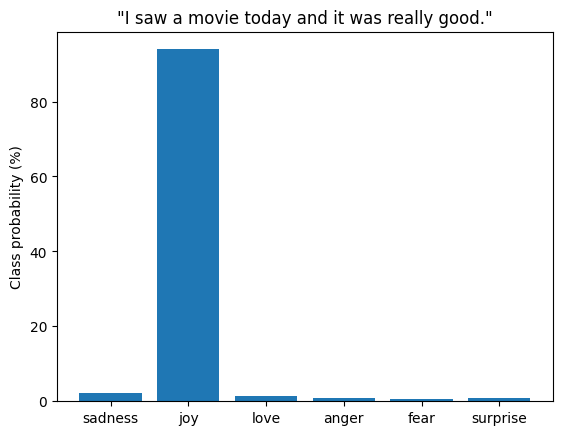

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
preds_sorted = sorted(preds, key=lambda d: d['label'])
preds_df = pd.DataFrame(preds_sorted)
plt.bar(labels, 100*preds_df['score'], color='C0')
plt.title(f'"{sample_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()